#Feature Extraction(skip if .csv made)

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [ ]:
!gsutil cp gs://ragaclass/raga.zip .

In [ ]:
!gsutil cp 'gs://ragaclass/New Data.zip' .

Copying gs://ragaclass/New Data.zip...
- [1 files][  1.7 GiB/  1.7 GiB]   11.0 MiB/s                                   
Operation completed over 1 objects/1.7 GiB.                                      


In [ ]:
!unrar raga.zip .
!rm raga.zip

In [ ]:
!unzip '/content/New Data.zip' -d /content/Audio/

Archive:  /content/New Data.zip
   creating: /content/Audio/New Data/
   creating: /content/Audio/New Data/darbar/
  inflating: /content/Audio/New Data/darbar/Aruna Sairam - Adiya Pada Darishanam.mp3  
  inflating: /content/Audio/New Data/darbar/Bombay Jayashri - Munduvenuga.mp3  
  inflating: /content/Audio/New Data/darbar/M. S. Gopalakrishnan - Ramabhirama.mp3  
  inflating: /content/Audio/New Data/darbar/M. S. Gopalakrishnan - Yachana.mp3  
  inflating: /content/Audio/New Data/darbar/Maharajapuram Santhanam - Mundu Venuga.mp3  
  inflating: /content/Audio/New Data/darbar/Prasanna Venkataraman - Chalamela Jesevura.mp3  
  inflating: /content/Audio/New Data/darbar/Prasanna Venkataraman - Mundu Venuga.mp3  
  inflating: /content/Audio/New Data/darbar/R. K. Srikantan - Shoure.mp3  
  inflating: /content/Audio/New Data/darbar/S. Ramanathan - Chalamela.mp3  
  inflating: /content/Audio/New Data/darbar/Sangeetha Swaminathan - Mundu Venuga.mp3  
  inflating: /content/Audio/New Data/darbar/S

In [ ]:
import librosa
import numpy as np
import os
import pandas as pd

In [ ]:
columns=['filename','rmse','chroma_stft','spec_cent','spec_bw','rolloff','zcr','mfcc0','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','raga']
dataset=pd.DataFrame(columns=columns)
ragas=os.listdir('/content/content/Audio/')
for raga in ragas:
  path = '/content/content/Audio/'+raga
  musics=os.listdir(path)
  for name in musics:
    vocals=path+'/'+name+'/'+'vocals.wav'
    songname=vocals
    filename=name
    y, sr = librosa.load(songname, mono=True)
    dur = librosa.get_duration(y=y, sr=sr)
    off=0


    if dur > 300:
      for i in range(10):
        x, sr = librosa.load(songname, mono=True,offset=off,duration=30)
        rmse = librosa.feature.rmse(y=x)[0]
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(y=x, sr=sr)
        filename = name+'-'+str(i+1)
        data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
        dataseries = pd.Series(data, index = dataset.columns)
        dataset = dataset.append(dataseries, ignore_index=True)
        print(filename+" "+raga+" added" + 'dur '+str(dur))
        if i in range(0,3):
          off=off+30
        if i in range(3,7):
          off=(dur/10)*i
        if i in range(7,10):
          off= dur - ((10-i)*30)

    else:
      for i in range(10):
        x, sr = librosa.load(songname, mono=True,offset=off,duration=(dur/10))
        rmse = librosa.feature.rmse(y=x)[0]
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(y=x, sr=sr)
        filename = name+'-'+str(i+1)
        data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
        dataseries = pd.Series(data, index = dataset.columns)
        dataset = dataset.append(dataseries, ignore_index=True)
        print(filename+" "+raga+" added(small)"+'dur '+str(dur))
        off=(dur/10)*(i)



In [ ]:
columns=['filename','rmse','chroma_stft','spec_cent','spec_bw','rolloff','zcr','mfcc0','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','raga']
dataset=pd.DataFrame(columns=columns)
ragas=os.listdir('/content/Audio/New Data/')
for raga in ragas:
  path = '/content/Audio/New Data/'+raga
  musics=os.listdir(path)
  for name in musics:
    vocals=path+'/'+name
    songname=vocals
    filename=name
    y, sr = librosa.load(songname, mono=True)
    dur = librosa.get_duration(y=y, sr=sr)
    off=0


    if dur > 300:
      for i in range(10):
        x, sr = librosa.load(songname, mono=True,offset=off,duration=30)
        rmse = librosa.feature.rmse(y=x)[0]
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(y=x, sr=sr)
        filename = name+'-'+str(i+1)
        data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
        dataseries = pd.Series(data, index = dataset.columns)
        dataset = dataset.append(dataseries, ignore_index=True)
        print(filename+" "+raga+" added" + 'dur '+str(dur))
        if i in range(0,3):
          off=off+30
        if i in range(3,7):
          off=(dur/10)*i
        if i in range(7,10):
          off= dur - ((10-i)*30)

    else:
      for i in range(10):
        x, sr = librosa.load(songname, mono=True,offset=off,duration=(dur/10))
        rmse = librosa.feature.rmse(y=x)[0]
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(y=x, sr=sr)
        filename = name+'-'+str(i+1)
        data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
        dataseries = pd.Series(data, index = dataset.columns)
        dataset = dataset.append(dataseries, ignore_index=True)
        print(filename+" "+raga+" added(small)"+'dur '+str(dur))
        off=(dur/10)*(i)



M. S. Gopalakrishnan - Ramabhirama.mp3-1 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-2 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-3 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-4 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-5 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-6 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-7 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-8 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-9 darbar added(small)dur 248.52897959183673
M. S. Gopalakrishnan - Ramabhirama.mp3-10 darbar added(small)dur 248.52897959183673
Sanjay Subrahmanyan - Munduvenuka.mp3-1 darbar addeddur 1224.0
Sanjay Subrahmanyan - Munduvenuka.mp3-2 darbar addeddur 1224.0
Sanjay Subrahmanyan - Munduvenuka.mp3-3 dar

In [ ]:
dataset.shape

(2340, 28)

In [ ]:
print("Done")

In [ ]:
ragas=os.listdir('/content/content/Audio/')
for raga in ragas:
  path = '/content/content/Audio/'+raga
  musics=os.listdir(path)
  for name in musics:
    vocals=path+'/'+name+'/'+'vocals.wav'
    songname=vocals
    filename=name
    y, sr = librosa.load(songname, mono=True, duration=30)
    rmse = librosa.feature.rmse(y=y)[0]
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
    dataseries = pd.Series(data, index = dataset.columns)
    dataset = dataset.append(dataseries, ignore_index=True)
    print(name+" "+raga+" added")


In [ ]:
print(dataset)

In [ ]:
dataset.to_csv('dataset.csv')

In [ ]:
dataset.to_csv('dataset-nosource2.csv')

In [ ]:
!gsutil cp '/content/dataset-nosource.csv' 'gs://ragaclass/'

Copying file:///content/dataset-nosource.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/817.9 KiB.                                    


#Model Training

In [ ]:
import os
import librosa
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.read_csv('dataset-best.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#Encoding the Labels
raga_list = data.iloc[:, -1]
encoder = LabelEncoder()
Y = encoder.fit_transform(raga_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
data2 = pd.read_csv('dataset-nosource.csv')
# Dropping unneccesary columns
data2 = data2.drop(['filename'],axis=1)
#Encoding the Labels
raga_list2 = data2.iloc[:, -1]
encoder = LabelEncoder()
Y2 = encoder.fit_transform(raga_list2)
#Scaling the Feature columns
scaler = StandardScaler()
X2 = scaler.fit_transform(np.array(data2.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.25)

In [ ]:
use_tpu=True
if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
tpu_address = TF_MASTER

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.16.85.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.16.85.146:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


#ANN Model

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               7168      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 48,970
Trainable params: 48,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier = model.fit(X_train, y_train,batch_size=128, epochs=500, validation_data=(X_test,y_test))

Epoch 1/500
 1/14 [=>............................] - ETA: 0s - loss: 2.3321 - accuracy: 0.0469WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 0.0089s). Check your callbacks.


10/14 [====================>.........] - ETA: 0s - loss: 2.2157 - accuracy: 0.2016WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_test_batch_end` time: 0.0041s). Check your callbacks.


14/14 [==============================] - 0s 33ms/step - loss: 2.1781 - accuracy: 0.2308 - val_loss: 2.0283 - val_accuracy: 0.3179
Epoch 2/500
14/14 [==============================] - 0s 14ms/step - loss: 1.8014 - accuracy: 0.4154 - val_loss: 1.6797 - val_accuracy: 0.4376
Epoch 3/500
14/14 [==============================] - 0s 15ms/step - loss: 1.4292 - accuracy: 0.5442 - val_loss: 1.3575 - val_accuracy: 0.5214
Epoch 4/500
14/14 [==============================] - 0s 14ms/step - loss: 1.1043 - accuracy: 0.6689 - val_loss: 1.1072 - val_accuracy: 0.6068
Epoch 5/500
14/14 [==============================] - 0s 13ms/step - loss: 0.8766 - accuracy: 0.7413 - val_loss: 0.9400 - val_accuracy: 0.6752
Epoch 6/500
14/14 [==============================] - 0s 13ms/step - loss: 0.7160 - accuracy: 0.7869 - val_loss: 0.8203 - val_accuracy: 0.6872
Epoch 7/500
14/14 [==============================] - 0s 13ms/step - loss: 0.5921 - accuracy: 0.8251 - val_loss: 0.7174 - val_accuracy: 0.7487
Epoch 8/500
14/14 

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train2.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               7168      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                650       
Total params: 48,970
Trainable params: 48,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier2 = model.fit(X_train2, y_train2,batch_size=128, epochs=500, validation_data=(X_test2,y_test2))

Train on 1125 samples, validate on 375 samples
Epoch 1/500
1125/1125 [==============================] - 0s 159us/step - loss: 2.2330 - accuracy: 0.2160 - val_loss: 2.1395 - val_accuracy: 0.3333
Epoch 2/500
1125/1125 [==============================] - 0s 69us/step - loss: 2.0072 - accuracy: 0.4329 - val_loss: 1.9663 - val_accuracy: 0.3840
Epoch 3/500
1125/1125 [==============================] - 0s 70us/step - loss: 1.7661 - accuracy: 0.4871 - val_loss: 1.7484 - val_accuracy: 0.4800
Epoch 4/500
1125/1125 [==============================] - 0s 71us/step - loss: 1.4844 - accuracy: 0.5884 - val_loss: 1.4712 - val_accuracy: 0.5733
Epoch 5/500
1125/1125 [==============================] - 0s 71us/step - loss: 1.2073 - accuracy: 0.6658 - val_loss: 1.2367 - val_accuracy: 0.6213
Epoch 6/500
1125/1125 [==============================] - 0s 70us/step - loss: 0.9637 - accuracy: 0.7342 - val_loss: 1.0315 - val_accuracy: 0.6907
Epoch 7/500
1125/1125 [==============================] - 0s 70us/step - loss

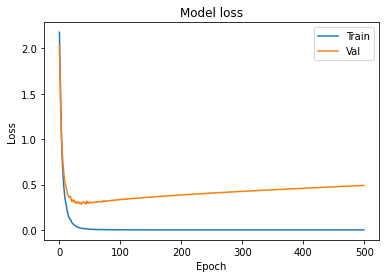

In [ ]:
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

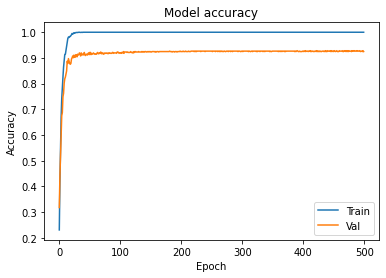

In [ ]:
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

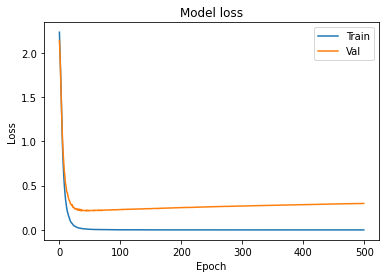

In [ ]:
plt.plot(classifier2.history['loss'])
plt.plot(classifier2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

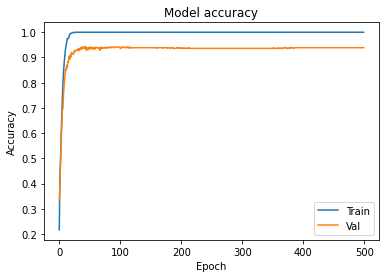

In [ ]:
plt.plot(classifier2.history['accuracy'])
plt.plot(classifier2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
import librosa
columns=['ind','rmse','chroma_stft','spec_cent','spec_bw','rolloff','zcr','mfcc0','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19']
dataset_pred=pd.DataFrame(columns=columns)
songname='/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3'
y, sr = librosa.load(songname, mono=True)
dur = librosa.get_duration(y=y, sr=sr)
off=0
if dur > 300:
    for i in range(10):
                      x, sr = librosa.load(songname, mono=True,offset=off,duration=30)
                      rmse = librosa.feature.rmse(y=x)[0]
                      chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
                      spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
                      spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
                      rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
                      zcr = librosa.feature.zero_crossing_rate(x)
                      mfcc = librosa.feature.mfcc(y=x, sr=sr)
                      filename = songname+'-'+str(i+1)
                      data=[i,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19])]
                      dataseries = pd.Series(data, index = dataset_pred.columns)
                      dataset_pred = dataset_pred.append(dataseries, ignore_index=True)
                      print(filename+" added" + 'dur '+str(dur))
                      if i in range(0,3):
                        off=off+30
                      if i in range(3,7):
                        off=(dur/10)*i
                      if i in range(7,10):
                        off= dur - ((10-i)*30)

else:
    for i in range(10):
                      x, sr = librosa.load(songname, mono=True,offset=off,duration=(dur/10))
                      rmse = librosa.feature.rmse(y=x)[0]
                      chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
                      spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
                      spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
                      rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
                      zcr = librosa.feature.zero_crossing_rate(x)
                      mfcc = librosa.feature.mfcc(y=x, sr=sr)
                      filename = songname+'-'+str(i+1)
                      data=[i,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19])]
                      dataseries = pd.Series(data, index = dataset_pred.columns)
                      dataset_pred = dataset_pred.append(dataseries, ignore_index=True)
                      print(filename+" added(small)"+'dur '+str(dur))
                      off=(dur/10)*(i)
print(dataset_pred)


example = scaler.transform(np.array(dataset_pred.iloc[:,:], dtype = float))

preds = model.predict(example)
best_preds = np.asarray([np.argmax(line) for line in preds])

raganame=set()
for i in range(len(raga_list)):
  raganame.add((raga_list[i],Y[i]))
raganame=list(raganame)
raganame.sort()
print(best_preds)
print("Raga for this song is : "+raganame[best_preds[0]][0])

/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-1 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-2 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-3 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-4 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-5 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-6 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-7 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-8 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-9 addeddur 387.3175510204082
/content/Aruna Sairam - Anathaselvam - Kurai Onrumillai.mp3-10 addeddur 387.3175510204082
   ind      rmse  chroma_stft  ...    mfcc17    mfcc18     mfcc19
0  0.0  0.075252     0.252327  ... -1.57539

In [ ]:
print(raganame)

[('darbar', 0), ('jaganmohini', 1), ('jaunpuri', 2), ('mayamalava gaula', 3), ('ragamalika', 4), ('shanmukhapriya', 5), ('varali', 6), ('vasanta', 7), ('yadukula kambhoji', 8), ('yamuna kalyani', 9)]


#LSTM Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True,input_shape=input_shape))
model.add(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            79872     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 129,930
Trainable params: 129,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 35 # num of training examples per minibatch
num_epochs =300
classify2 = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test,y_test),
)

Epoch 1/300
 1/51 [..............................] - ETA: 31s - loss: 2.3003 - accuracy: 0.1143WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0009s vs `on_train_batch_end` time: 0.0117s). Check your callbacks.


47/51 [==========================>...] - ETA: 0s - loss: 2.2762 - accuracy: 0.2128WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0008s vs `on_test_batch_end` time: 0.0035s). Check your callbacks.


51/51 [==============================] - 2s 36ms/step - loss: 2.2727 - accuracy: 0.2228 - val_loss: 2.2266 - val_accuracy: 0.3179
Epoch 2/300
51/51 [==============================] - 1s 14ms/step - loss: 2.1021 - accuracy: 0.3556 - val_loss: 1.9451 - val_accuracy: 0.3692
Epoch 3/300
51/51 [==============================] - 1s 14ms/step - loss: 1.7337 - accuracy: 0.3698 - val_loss: 1.5861 - val_accuracy: 0.3966
Epoch 4/300
51/51 [==============================] - 1s 14ms/step - loss: 1.4225 - accuracy: 0.4627 - val_loss: 1.2914 - val_accuracy: 0.5385
Epoch 5/300
51/51 [==============================] - 1s 14ms/step - loss: 1.1489 - accuracy: 0.5909 - val_loss: 1.0280 - val_accuracy: 0.6718
Epoch 6/300
51/51 [==============================] - 1s 14ms/step - loss: 0.9672 - accuracy: 0.6707 - val_loss: 0.8671 - val_accuracy: 0.7077
Epoch 7/300
51/51 [==============================] - 1s 14ms/step - loss: 0.8505 - accuracy: 0.7197 - val_loss: 0.7636 - val_accuracy: 0.7470
Epoch 8/300
51/51 

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
input_shape = (X_train2.shape[1], X_train2.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True,input_shape=input_shape))
model.add(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1, 128)            79872     
_________________________________________________________________
lstm_16 (LSTM)               (None, 1, 64)             49408     
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 129,930
Trainable params: 129,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 35 # num of training examples per minibatch
num_epochs =300
classify2 = model.fit(
    X_train2,
    y_train2,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test2,y_test2),
)

Train on 1125 samples, validate on 375 samples
Epoch 1/300
1125/1125 [==============================] - 1s 887us/step - loss: 2.2802 - accuracy: 0.2356 - val_loss: 2.2493 - val_accuracy: 0.3360
Epoch 2/300
1125/1125 [==============================] - 0s 312us/step - loss: 2.1964 - accuracy: 0.3671 - val_loss: 2.1444 - val_accuracy: 0.3360
Epoch 3/300
1125/1125 [==============================] - 0s 302us/step - loss: 2.0208 - accuracy: 0.3751 - val_loss: 1.9315 - val_accuracy: 0.3760
Epoch 4/300
1125/1125 [==============================] - 0s 299us/step - loss: 1.7543 - accuracy: 0.4267 - val_loss: 1.6811 - val_accuracy: 0.3547
Epoch 5/300
1125/1125 [==============================] - 0s 289us/step - loss: 1.5058 - accuracy: 0.4924 - val_loss: 1.4590 - val_accuracy: 0.4640
Epoch 6/300
1125/1125 [==============================] - 0s 295us/step - loss: 1.3049 - accuracy: 0.5716 - val_loss: 1.2620 - val_accuracy: 0.6000
Epoch 7/300
1125/1125 [==============================] - 0s 283us/step 

In [ ]:
plt.plot(classify.history['loss'])
plt.plot(classify.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

NameError: ignored

In [ ]:
plt.plot(classify.history['accuracy'])
plt.plot(classify.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

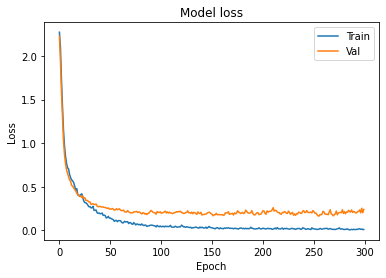

In [ ]:
plt.plot(classify2.history['loss'])
plt.plot(classify2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

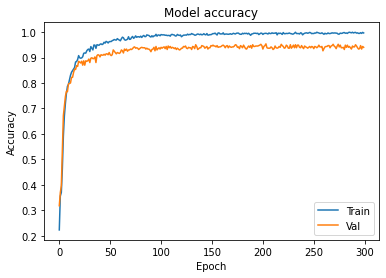

In [ ]:
plt.plot(classify2.history['accuracy'])
plt.plot(classify2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#BiLSTM Model


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(Bidirectional(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True),input_shape=input_shape))
model.add(Bidirectional(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True)))
model.add(Flatten())
model.add(Dense(units=20, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 1, 256)            159744    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 1, 128)            164352    
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 20)                2580      
Total params: 326,676
Trainable params: 326,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 35 # num of training examples per minibatch
num_epochs =300
classify = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test,y_test),
)

Train on 1125 samples, validate on 375 samples
Epoch 1/300
1125/1125 [==============================] - 2s 2ms/step - loss: 2.9079 - accuracy: 0.2480 - val_loss: 2.7687 - val_accuracy: 0.3733
Epoch 2/300
1125/1125 [==============================] - 0s 342us/step - loss: 2.5374 - accuracy: 0.3591 - val_loss: 2.2525 - val_accuracy: 0.3893
Epoch 3/300
1125/1125 [==============================] - 0s 354us/step - loss: 1.8886 - accuracy: 0.4373 - val_loss: 1.5540 - val_accuracy: 0.5013
Epoch 4/300
1125/1125 [==============================] - 0s 330us/step - loss: 1.3418 - accuracy: 0.5653 - val_loss: 1.1855 - val_accuracy: 0.5840
Epoch 5/300
1125/1125 [==============================] - 0s 314us/step - loss: 1.0555 - accuracy: 0.6542 - val_loss: 0.9611 - val_accuracy: 0.6693
Epoch 6/300
1125/1125 [==============================] - 0s 322us/step - loss: 0.8650 - accuracy: 0.7209 - val_loss: 0.8032 - val_accuracy: 0.7600
Epoch 7/300
1125/1125 [==============================] - 0s 310us/step - 

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
input_shape = (X_train2.shape[1], X_train2.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(Bidirectional(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True),input_shape=input_shape))
model.add(Bidirectional(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True)))
model.add(Flatten())
model.add(Dense(units=20, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 1, 256)            159744    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 1, 128)            164352    
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                2580      
Total params: 326,676
Trainable params: 326,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 35 # num of training examples per minibatch
num_epochs =300
classify2 = model.fit(
    X_train2,
    y_train2,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test2,y_test2),
)

Train on 1125 samples, validate on 375 samples
Epoch 1/300
1125/1125 [==============================] - 2s 1ms/step - loss: 2.9046 - accuracy: 0.2516 - val_loss: 2.7838 - val_accuracy: 0.2427
Epoch 2/300
1125/1125 [==============================] - 0s 344us/step - loss: 2.5159 - accuracy: 0.3084 - val_loss: 2.2484 - val_accuracy: 0.2773
Epoch 3/300
1125/1125 [==============================] - 0s 347us/step - loss: 1.8761 - accuracy: 0.3938 - val_loss: 1.6461 - val_accuracy: 0.3920
Epoch 4/300
1125/1125 [==============================] - 0s 338us/step - loss: 1.3624 - accuracy: 0.5404 - val_loss: 1.2534 - val_accuracy: 0.5760
Epoch 5/300
1125/1125 [==============================] - 0s 320us/step - loss: 1.0354 - accuracy: 0.6782 - val_loss: 1.0174 - val_accuracy: 0.6533
Epoch 6/300
1125/1125 [==============================] - 0s 310us/step - loss: 0.8080 - accuracy: 0.7413 - val_loss: 0.8515 - val_accuracy: 0.7013
Epoch 7/300
1125/1125 [==============================] - 0s 310us/step - 

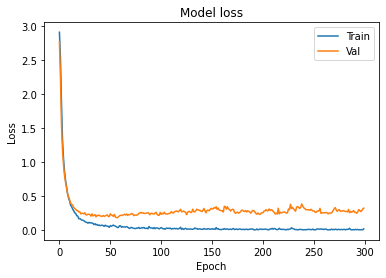

In [ ]:
plt.plot(classify.history['loss'])
plt.plot(classify.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

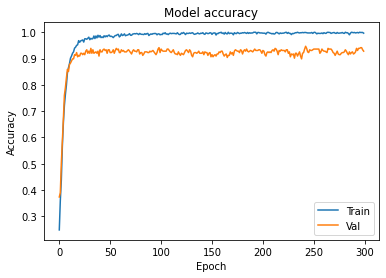

In [ ]:
plt.plot(classify.history['accuracy'])
plt.plot(classify.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Prediction

In [ ]:
import librosa
from collections import Counter
columns=['ind','rmse','chroma_stft','spec_cent','spec_bw','rolloff','zcr','mfcc0','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19']
dataset_pred=pd.DataFrame(columns=columns)
songname='/content/Nithyasree Mahadevan - Sabha Pathiku.mp3'
y, sr = librosa.load(songname, mono=True)
dur = librosa.get_duration(y=y, sr=sr)
off=0
if dur > 300:
    for i in range(10):
                      x, sr = librosa.load(songname, mono=True,offset=off,duration=30)
                      rmse = librosa.feature.rmse(y=x)[0]
                      chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
                      spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
                      spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
                      rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
                      zcr = librosa.feature.zero_crossing_rate(x)
                      mfcc = librosa.feature.mfcc(y=x, sr=sr)
                      filename = songname+'-'+str(i+1)
                      data=[i,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19])]
                      dataseries = pd.Series(data, index = dataset_pred.columns)
                      dataset_pred = dataset_pred.append(dataseries, ignore_index=True)
                      print(filename+" added" + 'dur '+str(dur))
                      if i in range(0,3):
                        off=off+30
                      if i in range(3,7):
                        off=(dur/10)*i
                      if i in range(7,10):
                        off= dur - ((10-i)*30)

else:
    for i in range(10):
                      x, sr = librosa.load(songname, mono=True,offset=off,duration=(dur/10))
                      rmse = librosa.feature.rmse(y=x)[0]
                      chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
                      spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
                      spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
                      rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
                      zcr = librosa.feature.zero_crossing_rate(x)
                      mfcc = librosa.feature.mfcc(y=x, sr=sr)
                      filename = songname+'-'+str(i+1)
                      data=[i,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr),np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19])]
                      dataseries = pd.Series(data, index = dataset_pred.columns)
                      dataset_pred = dataset_pred.append(dataseries, ignore_index=True)
                      print(filename+" added(small)"+'dur '+str(dur))
                      off=(dur/10)*(i)
print(dataset_pred)


example = scaler.transform(np.array(dataset_pred.iloc[:,:], dtype = float))
example = np.reshape(example, (example.shape[0], 1, example.shape[1]))
preds = model.predict(example)
best_preds = np.asarray([np.argmax(line) for line in preds])

raganame=set()
for i in range(len(raga_list)):
  raganame.add((raga_list[i],Y[i]))
raganame=list(raganame)
raganame.sort()

print(preds)

print(best_preds)
b=Counter(best_preds)
print(b.most_common(1)[0][0])
raga_no=b.most_common(1)[0][0]
print("Raga for this song is : "+raganame[raga_no][0])

/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-1 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-2 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-3 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-4 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-5 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-6 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-7 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-8 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-9 addeddur 1686.3085714285714
/content/Nithyasree Mahadevan - Sabha Pathiku.mp3-10 addeddur 1686.3085714285714
   ind      rmse  chroma_stft  ...     mfcc17    mfcc18    mfcc19
0  0.0  0.031171     0.261717  ...   7.061930  1.720514  0.832533
1  1.0  0.036954     0.226733  ...   7.187535 -5.456522  1.334473
2

In [ ]:
print(raganame)

[('Purvikalyani', 0), ('abhogi', 1), ('ananda bhairavi', 2), ('atana', 3), ('begada', 4), ('behag', 5), ('bhairavi', 6), ('bilahari', 7), ('hamsadhvani', 8), ('hindolam', 9)]


# 20 RAgas


In [ ]:
data3 = pd.read_csv('dataset-big.csv')
# Dropping unneccesary columns
data3 = data3.drop(['filename'],axis=1)
#Encoding the Labels
raga_list3 = data3.iloc[:, -1]
encoder = LabelEncoder()
Y3 = encoder.fit_transform(raga_list3)
#Scaling the Feature columns
scaler = StandardScaler()
X3 = scaler.fit_transform(np.array(data3.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25)

#ANN Model

In [ ]:
model3 = Sequential()
model3.add(layers.Dense(256, activation='relu', input_shape=(X_train3.shape[1],)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(20, activation='softmax'))
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               7168      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1300      
Total params: 49,620
Trainable params: 49,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier3 = model3.fit(X_train3, y_train3,batch_size=128, epochs=500, validation_data=(X_test3,y_test3))

Epoch 1/500
23/23 [==============================] - 0s 11ms/step - loss: 2.8882 - accuracy: 0.1118 - val_loss: 2.7066 - val_accuracy: 0.1792
Epoch 2/500
23/23 [==============================] - 0s 5ms/step - loss: 2.4708 - accuracy: 0.2580 - val_loss: 2.2235 - val_accuracy: 0.3000
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 1.9647 - accuracy: 0.3819 - val_loss: 1.8036 - val_accuracy: 0.4146
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 1.5707 - accuracy: 0.5035 - val_loss: 1.5019 - val_accuracy: 0.5156
Epoch 5/500
23/23 [==============================] - 0s 5ms/step - loss: 1.2874 - accuracy: 0.6003 - val_loss: 1.3130 - val_accuracy: 0.5688
Epoch 6/500
23/23 [==============================] - 0s 5ms/step - loss: 1.0923 - accuracy: 0.6507 - val_loss: 1.1373 - val_accuracy: 0.6208
Epoch 7/500
23/23 [==============================] - 0s 5ms/step - loss: 0.9457 - accuracy: 0.7031 - val_loss: 1.0615 - val_accuracy: 0.6375
Epoch 8/500


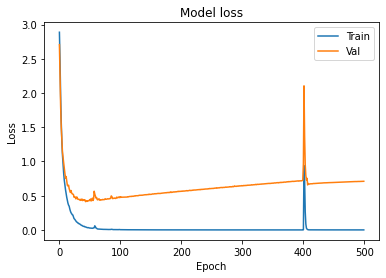

In [ ]:
plt.plot(classifier3.history['loss'])
plt.plot(classifier3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

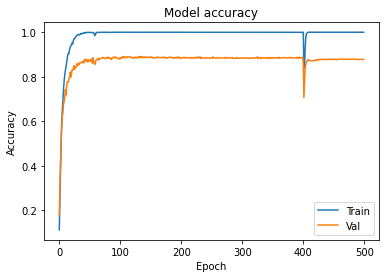

In [ ]:
plt.plot(classifier3.history['accuracy'])
plt.plot(classifier3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#LSTM Model

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))
input_shape = (X_train3.shape[1], X_train3.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True,input_shape=input_shape))
model.add(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=20, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            79872     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             49408     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                1300      
Total params: 130,580
Trainable params: 130,580
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 35 # num of training examples per minibatch
num_epochs =300
classify3 = model.fit(
    X_train3,
    y_train3,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test3,y_test3),
)

Epoch 1/300
83/83 [==============================] - 1s 13ms/step - loss: 2.9563 - accuracy: 0.1399 - val_loss: 2.8799 - val_accuracy: 0.1729
Epoch 2/300
83/83 [==============================] - 1s 8ms/step - loss: 2.6307 - accuracy: 0.2170 - val_loss: 2.3567 - val_accuracy: 0.2240
Epoch 3/300
83/83 [==============================] - 1s 7ms/step - loss: 2.1385 - accuracy: 0.2934 - val_loss: 1.9293 - val_accuracy: 0.3510
Epoch 4/300
83/83 [==============================] - 1s 8ms/step - loss: 1.7830 - accuracy: 0.4184 - val_loss: 1.6114 - val_accuracy: 0.4802
Epoch 5/300
83/83 [==============================] - 1s 8ms/step - loss: 1.5449 - accuracy: 0.5056 - val_loss: 1.4266 - val_accuracy: 0.5437
Epoch 6/300
83/83 [==============================] - 1s 8ms/step - loss: 1.4092 - accuracy: 0.5691 - val_loss: 1.3075 - val_accuracy: 0.5792
Epoch 7/300
83/83 [==============================] - 1s 7ms/step - loss: 1.2936 - accuracy: 0.6097 - val_loss: 1.2125 - val_accuracy: 0.6292
Epoch 8/300


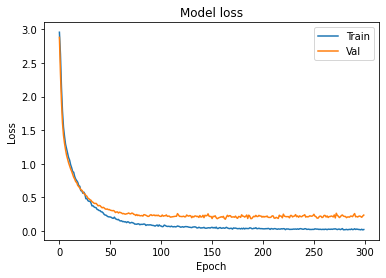

In [ ]:
plt.plot(classify3.history['loss'])
plt.plot(classify3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

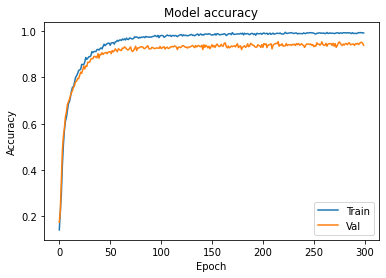

In [ ]:
plt.plot(classify3.history['accuracy'])
plt.plot(classify3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#BiLSTM Model


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))
input_shape = (X_train3.shape[1], X_train3.shape[2])
model = Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(Bidirectional(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True),input_shape=input_shape))
model.add(Bidirectional(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True)))
model.add(Flatten())
model.add(Dense(units=20, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 256)            159744    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1, 128)            164352    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                2580      
Total params: 326,676
Trainable params: 326,676
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 35 # num of training examples per minibatch
num_epochs =300
classify = model.fit(
    X_train3,
    y_train3,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_test3,y_test3),
)

Epoch 1/300
83/83 [==============================] - 2s 26ms/step - loss: 2.8524 - accuracy: 0.1851 - val_loss: 2.5419 - val_accuracy: 0.2031
Epoch 2/300
83/83 [==============================] - 1s 15ms/step - loss: 2.1993 - accuracy: 0.2861 - val_loss: 1.9200 - val_accuracy: 0.3510
Epoch 3/300
83/83 [==============================] - 1s 15ms/step - loss: 1.6551 - accuracy: 0.4500 - val_loss: 1.4586 - val_accuracy: 0.5521
Epoch 4/300
83/83 [==============================] - 1s 15ms/step - loss: 1.3133 - accuracy: 0.5646 - val_loss: 1.2190 - val_accuracy: 0.5958
Epoch 5/300
83/83 [==============================] - 1s 15ms/step - loss: 1.1516 - accuracy: 0.6264 - val_loss: 1.0812 - val_accuracy: 0.6656
Epoch 6/300
83/83 [==============================] - 1s 15ms/step - loss: 1.0240 - accuracy: 0.6753 - val_loss: 0.9759 - val_accuracy: 0.6927
Epoch 7/300
83/83 [==============================] - 1s 16ms/step - loss: 0.9282 - accuracy: 0.7059 - val_loss: 0.8890 - val_accuracy: 0.7115
Epoch 

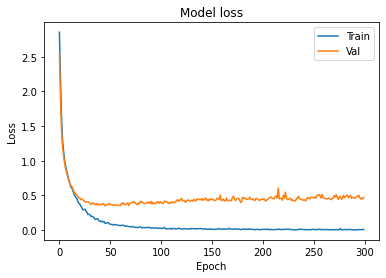

In [ ]:
plt.plot(classify.history['loss'])
plt.plot(classify.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

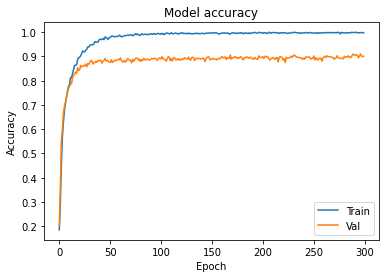

In [ ]:
plt.plot(classify.history['accuracy'])
plt.plot(classify.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# 1D Convolution Network

In [ ]:
import os
import librosa
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
import tensorflow.keras.layers as layers
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
data = pd.read_csv('dataset-instrument-big.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#Encoding the Labels
raga_list = data.iloc[:, -1]
encoder = LabelEncoder()
Y = encoder.fit_transform(raga_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])
X_train.shape[1], X_train.shape[2]

(1, 27)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(32,3, activation = "relu",padding = 'same', input_shape=input_shape))
model.add(layers.Conv1D(64,3,activation = 'relu',padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(20,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 32)             2624      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             6208      
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1300      
Total params: 14,292
Trainable params: 14,292
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train, y_train,batch_size=128, epochs=400, validation_data=(X_test,y_test))

Epoch 1/400
22/22 [==============================] - 0s 21ms/step - loss: 2.9897 - accuracy: 0.0645 - val_loss: 2.9693 - val_accuracy: 0.0927
Epoch 2/400
22/22 [==============================] - 0s 5ms/step - loss: 2.9555 - accuracy: 0.1042 - val_loss: 2.9371 - val_accuracy: 0.1369
Epoch 3/400
22/22 [==============================] - 0s 4ms/step - loss: 2.8979 - accuracy: 0.1370 - val_loss: 2.8685 - val_accuracy: 0.1446
Epoch 4/400
22/22 [==============================] - 0s 5ms/step - loss: 2.8039 - accuracy: 0.1531 - val_loss: 2.7252 - val_accuracy: 0.1769
Epoch 5/400
22/22 [==============================] - 0s 5ms/step - loss: 2.6239 - accuracy: 0.1771 - val_loss: 2.4922 - val_accuracy: 0.1896
Epoch 6/400
22/22 [==============================] - 0s 4ms/step - loss: 2.3955 - accuracy: 0.2085 - val_loss: 2.2284 - val_accuracy: 0.2543
Epoch 7/400
22/22 [==============================] - 0s 5ms/step - loss: 2.1861 - accuracy: 0.2540 - val_loss: 2.0291 - val_accuracy: 0.2985
Epoch 8/400


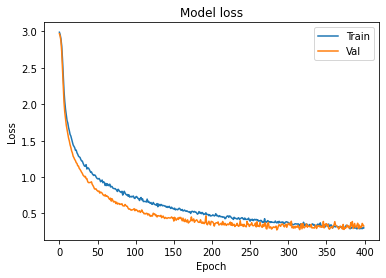

In [ ]:
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

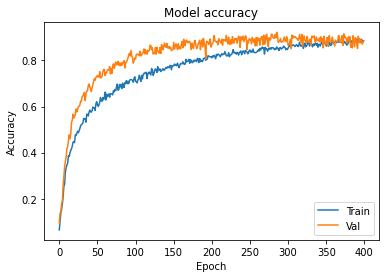

In [ ]:
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([18, 12,  4, ..., 13, 12, 10])

In [ ]:
y_test

array([18, 12,  4, ..., 13, 12, 10])

In [ ]:
model.evaluate(x=X_test, y=y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8852


[0.3275521993637085, 0.8852040767669678]

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(32,3, activation = "relu",padding = 'same', input_shape=input_shape))
model.add(layers.Conv1D(64,3,activation = 'relu',padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(20,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 32)             2624      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             6208      
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1300      
Total params: 14,292
Trainable params: 14,292
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train, y_train,batch_size=128, epochs=400, validation_data=(X_test,y_test))

Epoch 1/400
22/22 [==============================] - 0s 21ms/step - loss: 2.9897 - accuracy: 0.0645 - val_loss: 2.9693 - val_accuracy: 0.0927
Epoch 2/400
22/22 [==============================] - 0s 5ms/step - loss: 2.9555 - accuracy: 0.1042 - val_loss: 2.9371 - val_accuracy: 0.1369
Epoch 3/400
22/22 [==============================] - 0s 4ms/step - loss: 2.8979 - accuracy: 0.1370 - val_loss: 2.8685 - val_accuracy: 0.1446
Epoch 4/400
22/22 [==============================] - 0s 5ms/step - loss: 2.8039 - accuracy: 0.1531 - val_loss: 2.7252 - val_accuracy: 0.1769
Epoch 5/400
22/22 [==============================] - 0s 5ms/step - loss: 2.6239 - accuracy: 0.1771 - val_loss: 2.4922 - val_accuracy: 0.1896
Epoch 6/400
22/22 [==============================] - 0s 4ms/step - loss: 2.3955 - accuracy: 0.2085 - val_loss: 2.2284 - val_accuracy: 0.2543
Epoch 7/400
22/22 [==============================] - 0s 5ms/step - loss: 2.1861 - accuracy: 0.2540 - val_loss: 2.0291 - val_accuracy: 0.2985
Epoch 8/400


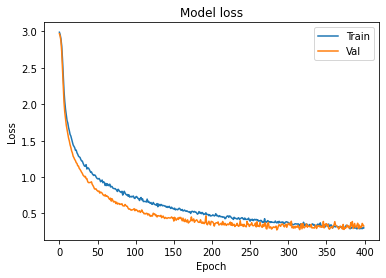

In [ ]:
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

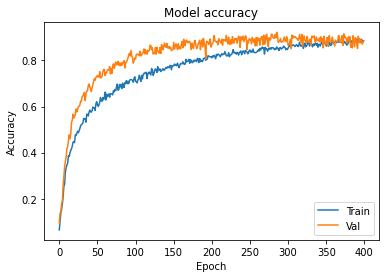

In [ ]:
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([18, 12,  4, ..., 13, 12, 10])

In [ ]:
y_test

array([18, 12,  4, ..., 13, 12, 10])

In [ ]:
model.evaluate(x=X_test, y=y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8852


[0.3275521993637085, 0.8852040767669678]